# Codes 1 – Clustering

# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "clustering"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Figures", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Clustering

[Cluster 17](https://cluster17.com/) and [ACP with R](http://www.sthda.com/french/articles/38-methodes-des-composantes-principales-dans-r-guide-pratique/73-acp-analyse-en-composantes-principales-avec-r-l-essentiel/) 


## Introduction – Classification _vs_ Clustering

<font color=red> Note 1

In [4]:
from sklearn.datasets import load_iris

We load the iris dataset.

In [5]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Saving figure classification_vs_clustering_plot


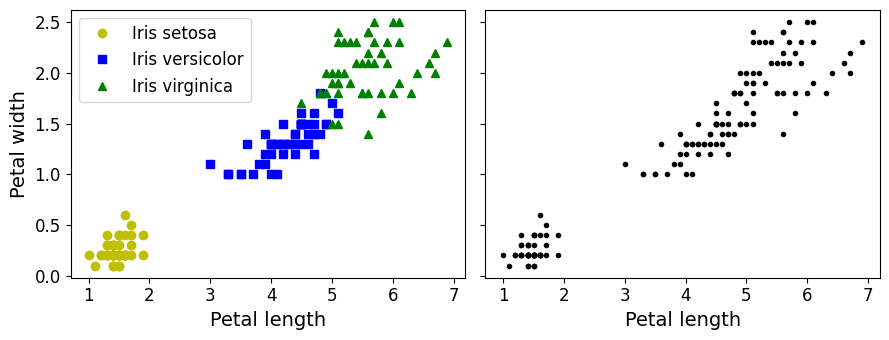

In [7]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show()

- On the left is the iris dataset where each instance’s species (i.e., its class) is represented with a different marker. It is a **labeled dataset**, for which classification algorithms such as Logistic Regression, SVMs or Random Forest classifiers are well suited. 

- On the right is the same dataset, but without the labels. It is an **unlabelled dataset**, so you cannot use a classification algorithm anymore. This is where clustering algorithms are useful: many of them can easily detect the bottom left cluster. But it is trickier to see that the upper right cluster is composed of two distinct sub-clusters...

The iris dataset has two additional features (sepal length and width) (not represented here) and clustering algorithms can make good use of all features, so in fact they identify the three clusters fairly well (e.g., using a Gaussian mixture model, only 5 instances out of 150 are assigned to the wrong cluster). 

Remark: Gaussian mixture is not presented in the following but that's an interesting clustering method for those interested in.

Let us try:

In [8]:
from sklearn.mixture import GaussianMixture

In [9]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
#We map the predicted clusters y_pred with the label y to make things comparable
mapping = np.array([2,0,1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

y_pred returns the label of the clusters associated with each instance. This is quite close to $y$ apparently:

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

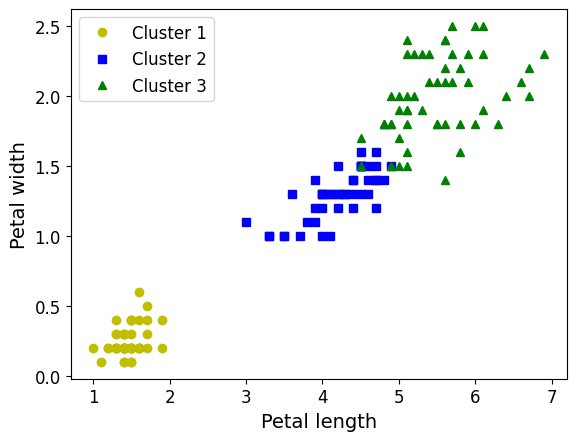

In [11]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [10]:
np.sum(y_pred==y)

145

145 over 150 instances are gathered in the correct class using the Gaussian Mixture clustering algorithm.

In [11]:
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

Percentage of correctly classified is 96.7%!!! 

BUT note that even if we are able to cluster the instances by similarity of their features, we don't actually know what are the corresponding labels. We only have informations on the features! But it is possible to compute the mean of the features for each class to know more about them. 

## K-Means

Let's start by generating a dataset:

In [12]:
from sklearn.datasets import make_blobs

In [13]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [14]:
blob_centers

array([[ 0.2,  2.3],
       [-1.5,  2.3],
       [-2.8,  1.8],
       [-2.8,  2.8],
       [-2.8,  1.3]])

The array above set the features' coordinates of the centroids of our 5 clusters... For instance, the centroid of the 2nd cluster has coordinates $x_1=-1.5$ and $x_2=2.3$. We will draw the features' instances from a normal distribution $\mathcal{N}(\color{red}-\color{red}1\color{red}.\color{red}5,0.3)$  $\mathcal{N}(\color{red}2\color{red}.\color{red}3,0.3)$ for the 2nd cluster.

In [15]:
blob_std

array([0.4, 0.3, 0.1, 0.1, 0.1])

The array above states how much is the dispersion of the instances around their centroids. For instance, in the 2nd centroid, we draw the instances from a normal distribution $\mathcal{N}(-1.5,{\color{red}0\color{red}.\color{red}3})$ and $\mathcal{N}(2.3,\color{red}0\color{red}.\color{red}3)$. 

The function `make_blobs` generates the corresponding features. We consider a dataset of 2000 instances. We consider 5 clusters with centroids defined by `centers=` and dispersion defined by `cluster_std=`. 

In [16]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

Now let's plot them:

In [17]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Saving figure blobs_plot


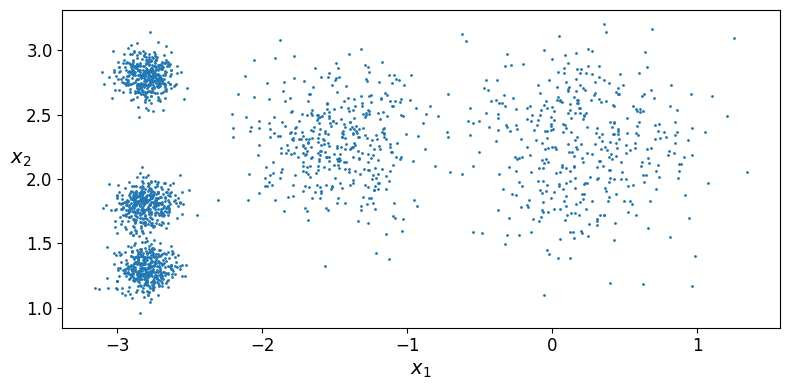

In [18]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

Consider the above unlabeled dataset: you can clearly see 5 blobs
of instances. The two on the right have much more dispersed features arount their centroids as we have defined a larger standard deviation (`cluster_std=`0.3 and 0.4) compared to the three on the left (`cluster_std=`0.1).

The K-Means algorithm is a simple algorithm capable of clustering this
kind of dataset very quickly and efficiently, often in just a few iterations.

<font color=red> Note 2

### Fit and Predict

Let's train a K-Means clusterer on this dataset. We will try to find each blob's center and assign each instance to the closest blob:

Note that you have to specify the number of clusters k that the algorithm must find.
In this example, it is pretty obvious from looking at the data that $k$ should be set to 5,
but in general it is not that easy. So, we set the number of clusters to $k=5$.

In [19]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In the context of clustering, an instance’s label is the index of the cluster that this instance gets assigned to by the algorithm: this is not to be confused with the class labels in classification (remember
that clustering is an unsupervised learning task). 

In [20]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [21]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In y_pred, each instance was assigned to one of the 5 clusters! The information is also available via the `labels_instance` variable.

We can also take a look at the 5 centroids that the algorithm found:

In [22]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

Of course, you can easily assign new instances to the cluster whose centroid is closest. Let us consider the four following instances with coordinates: 
- $(x_1,x_2)=(0, 2)$
- $(x_1,x_2)=(3, 2)$
- $(x_1,x_2)=(-3, 3)$
- $(x_1,x_2)=(-3, 2.5)$

In [23]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5], [-2, 3]])
kmeans.predict(X_new)

array([1, 1, 2, 2, 2], dtype=int32)

<font color=red> Note 3

### Decision Boundaries

Let's plot the model's decision boundaries. This gives us a _Voronoi diagram_ (where each centroid is represented with an X):

In [24]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=5, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


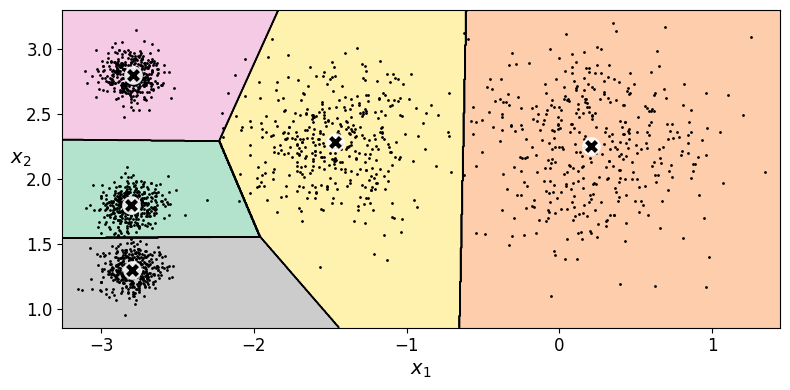

In [25]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

Not bad! The vast majority of the instances were clearly assigned to the appropriate cluster, but
a few instances were probably mislabeled (especially near the boundary between the
top left cluster and the central cluster). Indeed, the K-Means algorithm does not
behave very well when the blobs have very different diameters since all it cares about
when assigning an instance to a cluster is the distance to the centroid.

### Hard Clustering _vs_ Soft Clustering

Rather than arbitrarily choosing the closest cluster for each instance, which is called _hard clustering_, it might be better measure the distance of each instance to all 5 centroids. This is what the `transform()` method does:

Instead of assigning each instance to a single cluster, which is called hard clustering, it
can be useful to just give each instance a score per cluster: this is called soft clustering.
For example, the score can be the distance between the instance and the centroid. In the KMeans class, the transform() method measures the distance ($\mathcal{l_2}$-norm) from each instance to every centroid:

In [26]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622],
       [1.44340516, 2.33085705, 0.81862318, 0.89124174, 1.87824276]])

In this example, the first instance in X_new with coordinates $(x_1,x_2)=(0,2)$ is located at a distance of 2.88 from the first centroid, 0.329 from the second centroid, 2.90 from the third centroid, 1.49 from
the fourth centroid and 2.81 from the fifth centroid. 

<font color=red> Note 4

<font color=black> **Remark**: If you have a high-dimensional dataset (large number of features) and you transform it this way, you end up with a k-dimensional dataset: this can be a very efficient non-linear dimensionality reduction technique!

### K-Means Algorithm

The K-Means algorithm is **iterative** and one of the fastest clustering algorithms because number of iterations is generally small until the algorithm converges.

<font color=red> Note 5

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random"`, `n_init=1` and `algorithm="full"`. 

In [28]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", max_iter=1, random_state=100)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", max_iter=2, random_state=100)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", max_iter=3, random_state=100)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=100)

Jouer avec n_init et max_iter pour montrer que les centroïds d'origine ont une importance.

In [29]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm='lloyd', max_iter=1, random_state=10)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm='lloyd', max_iter=2, random_state=10)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm='lloyd', max_iter=3, random_state=10)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=10)

Saving figure kmeans_algorithm_plot


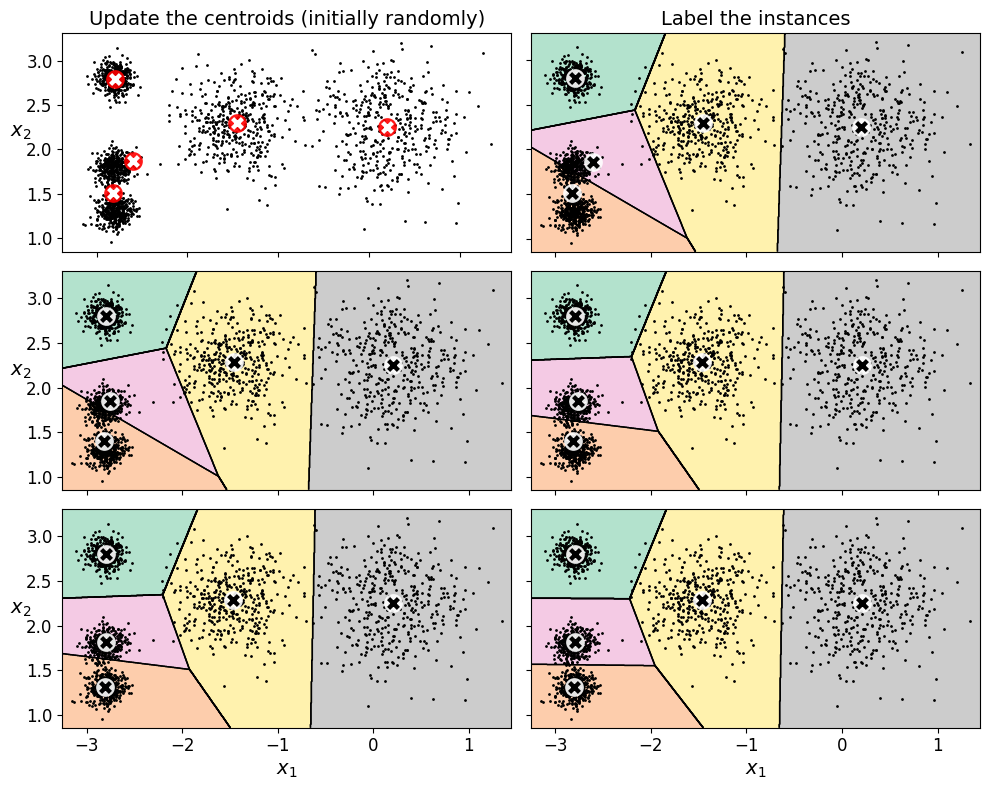

In [30]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

And let's plot this:

- The centroids are initialized randomly (top left)
- The instances are assigned to the centroid (top right)
- The centroids are updated (center left),
- The instances are relabeled (center right), 
and so on...

In just 3 iterations the algorithm has reached a clustering that seems close to optimal!!

### K-Means Variability

In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids.

However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:

In [31]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

We run two K-means algorithms with two disctinct random initializations of the centroids (using `random_state=`):

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Saving figure kmeans_variability_plot


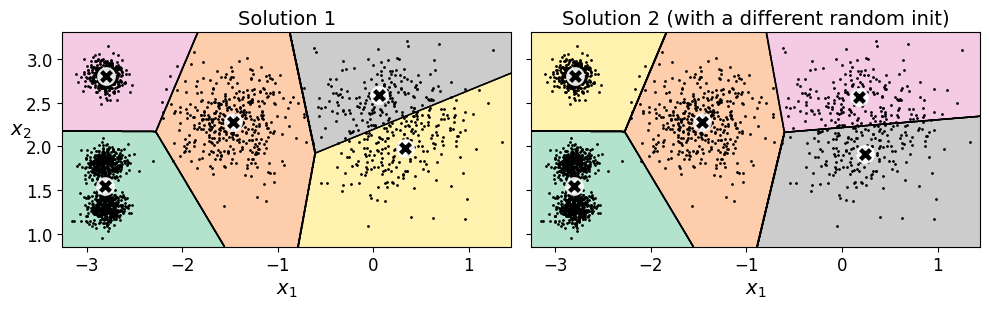

In [33]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=100)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=8)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

The algorithm converges in both cases but not to the right solution (sub-optimal solutions)

This is due to unlucky centroid initializations ...

It is possible to provide by your own the initializations (relevant if you have an idea of the underlying centroid or if you have already run the algorithm earlier). The code is below:

In [34]:
#We initialize the centroids as being not too far from the centroids.
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
y_pred =kmeans.fit(X)

If we have no idea of the optimal initialization... the trick is to run the algorithm multiple times with different random initializations and keep the best solution.

=> The best solution is the one minimizing the inertia performance metric!

### Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its closest centroid. This is the idea behind the _inertia_ metric.

<font color=red> Note 6

Model’s inertia is accessible via the `inertia_` variable

In [35]:
kmeans.inertia_

211.5985372581684

### Multiple Initializations

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. For example, here are the inertias of the two "bad" models shown in the previous figure:

In [36]:
kmeans_rnd_init1.inertia_

219.43539442771404

In [35]:
kmeans_rnd_init2.inertia_

219.83857990071826

As you can see, they have a higher inertia than the first "good" model we trained, which means they are probably worse.

When you set the `n_init` hyperparameter, Scikit-Learn runs the original algorithm `n_init` times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets `n_init=10`.

In [40]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=100,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=5, n_init=100,
       random_state=11)

As you can see, we end up with the initial model, which is certainly the optimal K-Means solution (at least in terms of inertia, and assuming $k=5$).

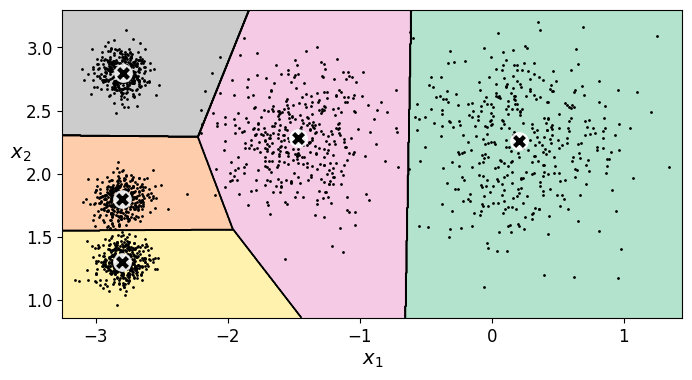

In [41]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### Finding the optimal number of clusters

So far, we have set the number of clusters $k=5$ because it was obvious by looking at
the data that this is the correct number of clusters. But in general, it will not be so
easy to know how to set $k$, and the result might be quite bad if you set it to the wrong
value.

What if the number of clusters was set to a lower or greater value than 5?

Saving figure bad_n_clusters_plot


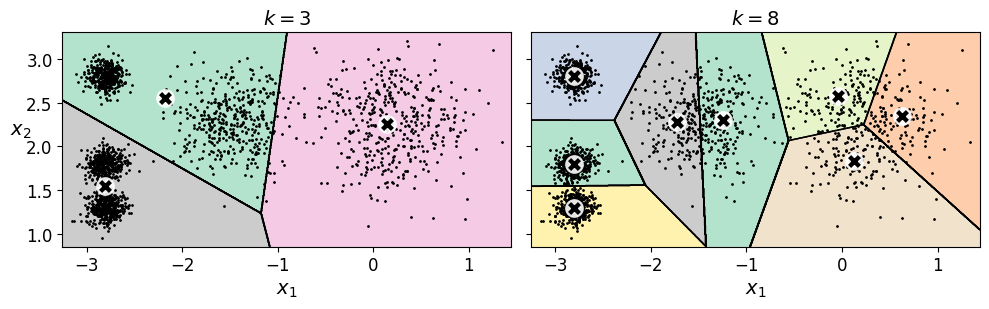

In [42]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

Ouch, these two models don't look great. For example, setting $k$ to 3 or 8 results in fairly bad models.

Let us calculate their inertias:

In [39]:
kmeans_k3.inertia_

653.2167190021553

In [40]:
kmeans_k8.inertia_

119.11983416102882

No, we cannot simply take the value of $k$ that minimizes the inertia, since it keeps getting lower as we increase $k$. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of $k$ and analyze the resulting curve:

In [43]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Saving figure inertia_vs_k_plot


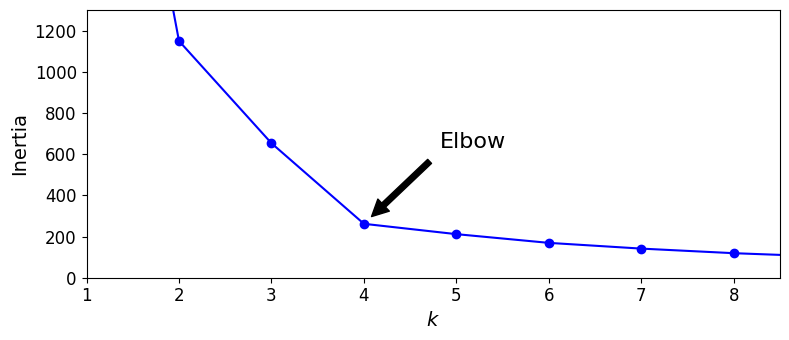

In [44]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

As you can see, there is an elbow at $k=4$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

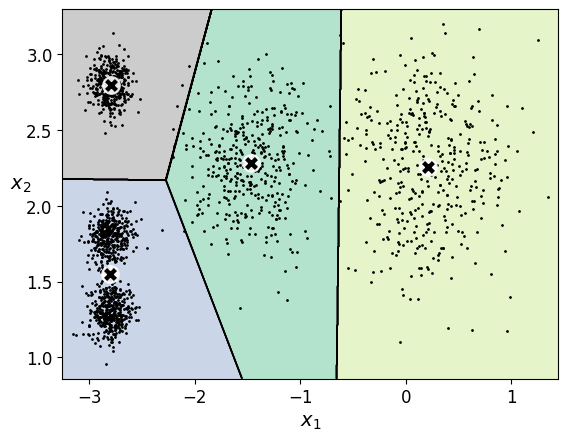

In [45]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

Another approach is to look at the _silhouette score_, which is the mean _silhouette coefficient_ over all the instances.

<font color=red> Note 7

Let's plot the silhouette score as a function of $k$:

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

Average silhouette score is $0.655$ for $k=5$.

In [48]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

Saving figure silhouette_score_vs_k_plot


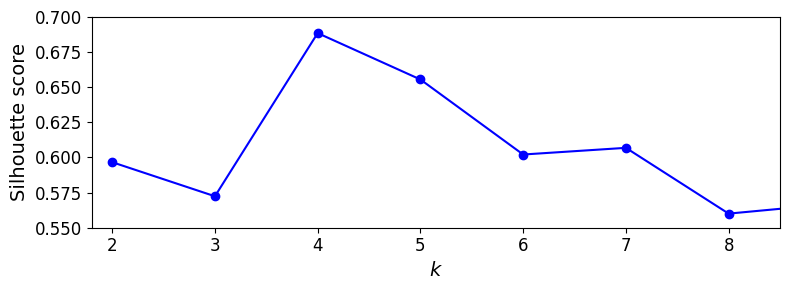

In [49]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

As you can see, this visualization is much richer than the previous one: in particular, although it confirms that $k=4$ is a very good choice, but it also underlines the fact that $k=5$ is quite good as well.

### Limits of K-Means

Despite its many merits, K-Means is not perfect. K-Means does not behave very well when the clusters have varying sizes,
different densities, or non-spherical shapes. Different densities means that the distribution of the features from one cluster to another are different (different variance, different shape, etc).

Let's consider an illustration of three ellipsoidal clusters of different densities:

In [50]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2] 

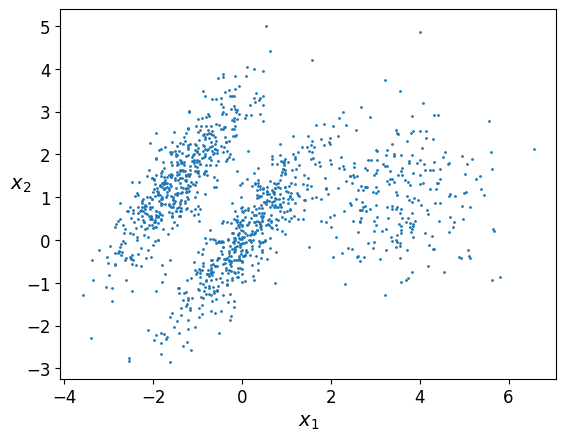

In [51]:
plot_clusters(X)

In [52]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

Saving figure bad_kmeans_plot


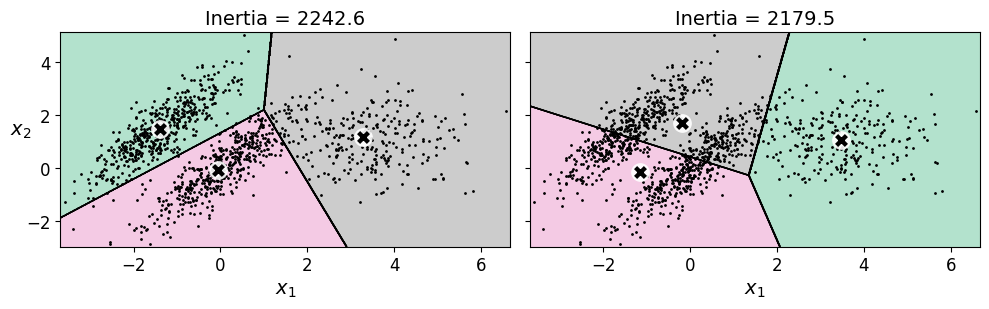

In [53]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

save_fig("bad_kmeans_plot")
plt.show()

As you can see, neither of these solutions are any good. The solution on the left is
better, but it still chops off 25% of the middle cluster and assigns it to the cluster on
the right. 

The solution on the right is just terrible, even though its inertia is lower. So
depending on the data, different clustering algorithms may perform better. For example,
on these types of elliptical clusters, DBSCAN models work great.

## DBSCAN

<font color=red> Note 8

The DBSCAN class in Scikit-Learn is as simple to use as
you might expect. Let’s test it on the moons dataset.

In [55]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [56]:
from sklearn.cluster import DBSCAN

We run the DBSCAN on the moons dataset. We consider a maximun distance $\epsilon=0.05$ (`eps=0.05`) and a minimum of 5 instances in the $\epsilon$-neighborhood (`min_samples=5`) for consideration as core instances . Thus, they are the two hyperparameters in the DBSCAN algorithm.

In [57]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

The labels of all the instances are now available in the `labels_` instance variable:

In [58]:
# First 10 instances' label
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

Notice that some instances have a cluster index equal to $-1$: this means that they are
considered as anomalies by the algorithm. The indices of the core instances are available
in the core_sample_indices_ instance variable, and the core instances themselves
are available in the components_ instance variable:

In [59]:
# Return the number of core instances
len(dbscan.core_sample_indices_)

808

In [60]:
# Return the indices of the core instances in the dataset
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [61]:
# Return the core instances (I mean the features' coordinates)
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

We run the DBSCAN with a maximun distance $𝜖=0.20$.

In [62]:
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [63]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Saving figure dbscan_plot


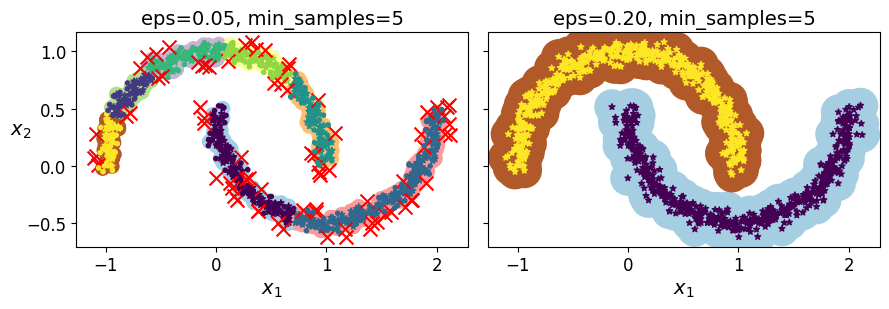

In [64]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()


The clustering with $\epsilon=0.05$ is represented on the left plot. There are quite a lot of anomalies (marked by crosses), plus 7 different clusters (in different colors). How disappointing! 

Fortunately, if we widen each instance’s neighborhood by increasing $\epsilon$ to 0.2, we get the clustering
on the right, which looks perfect. Let’s continue with this model.

In [62]:
dbscan = dbscan2

Somewhat surprisingly, the DBSCAN class does not have a predict() method,
although it has a fit_predict() method. In other words, it cannot predict which
cluster a new instance belongs to. 

The rationale for this decision is that the `KNeighborsClassifier` supervised algorithm will do the same job as soon as the clusters are built via DBSCAN.

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

Now, given a few new instances, we can predict which cluster they most likely belong
to, and even estimate a probability for each cluster. Note that we only trained them on
the core instances, but we could also have chosen to train them on all the instances,
or all but the anomalies.

That choice is up to the final task.

In [74]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([6, 0, 3, 2])

In [75]:
knn.predict_proba(X_new)

array([[0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

<font color=red> Note 9

Saving figure cluster_classification_plot


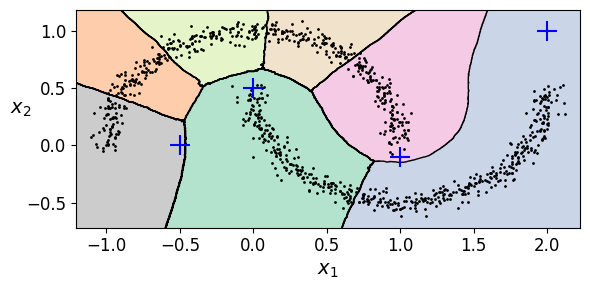

In [76]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

- The decision boundary of the KNN is represented by the black line. 

- The crosses represent the 4 instances in X_new. 

- Notice that since there is no anomaly in the KNN’s training set, the classifier always chooses a cluster, even when that cluster is far away. 